<a href="https://colab.research.google.com/github/Pathin220/4105_ML/blob/main/4105_Hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1916]:
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Machine Learning/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [1917]:

housing.shape

(545, 13)

In [1918]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [1919]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [1920]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
train, val = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

print('Training set after split : \n')
train.head()

Training set after split : 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
41,7840000,6360,3,2,4,1,0,0,0,1,0,1,furnished
91,6419000,6750,2,1,1,1,1,1,0,0,2,1,furnished
118,5950000,6420,3,1,1,1,0,1,0,1,0,1,furnished
472,3010000,3630,4,1,2,1,0,0,0,0,3,0,semi-furnished


In [1921]:
val.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,semi-furnished
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,semi-furnished
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,semi-furnished
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,semi-furnished
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,semi-furnished


In [1922]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

train[num_vars] = scaler.fit_transform(train[num_vars])
train_price = train.pop('price')
train.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,furnished
41,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,furnished
91,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,furnished
118,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,furnished
472,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,semi-furnished


In [1923]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
val[num_vars] = scaler.fit_transform(val[num_vars])
val_price = val.pop('price')
val.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,0.088172,0.333333,0.0,0.333333,1,0,0,0,0,0.000000,1,semi-furnished
54,0.311828,0.333333,0.5,0.333333,1,1,0,0,1,0.333333,0,semi-furnished
171,0.617849,0.333333,0.0,0.000000,1,0,0,0,0,0.333333,1,semi-furnished
244,0.263082,0.333333,0.0,0.333333,1,1,1,0,0,0.000000,1,semi-furnished
268,0.236559,0.666667,0.0,0.333333,1,0,0,0,1,0.000000,0,semi-furnished


In [1924]:
#Gradient descent function
def gradient_descent(train, val, train_price, val_price, alpha, theta, iterations):
    train_losses = []
    val_losses = []


    for iteration in range(iterations):
        gradients = 2/(len(train)) * train.T.dot(train.dot(theta) - train_price)
        theta = theta - alpha * gradients

        train_loss = (1/len(train)) * np.sum(np.square(train.dot(theta) - train_price))
        val_loss = (1/len(val)) * np.sum(np.square(val.dot(theta) - val_price))

        train_losses.append(train_loss)
        val_losses.append(val_loss)


    return train_losses, val_losses, theta



In [1925]:
# Problem 1.a and 1.b

# initial values for train and val
train_price = train.values[:, 0]
print('Price column for trainig set : \n', train_price[:5])

val_price = val.values[:, 0]
print('\n Price column for val set : \n', val_price[:5])

# Number of training examples for training set
train_len = len(train_price)
print('\n Length of training set = ', train_len)

# Number of training examples for val set
val_len = len(val_price)
print('\n Length of val set = ', val_len)

Price column for trainig set : 
 [0.4326093010303536 0.31495405179615704 0.34210526315789475
 0.3191311612364244 0.12489557226399334]

 Price column for val set : 
 [0.08817204301075268 0.3118279569892473 0.6178494623655914
 0.2630824372759857 0.23655913978494625]

 Length of training set =  436

 Length of val set =  109


In [1926]:
#1a
vars_a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
vars_a_train = np.c_[np.ones((train_len, 1)), train[vars_a]]
vars_a_val = np.c_[np.ones((val_len, 1)), val[vars_a]]

#1b
vars_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
vars_b_train = np.c_[np.ones((train_len, 1)), train[vars_b]]
vars_b_val = np.c_[np.ones((val_len, 1)), val[vars_b]]

In [1927]:
# Setting vairables
alpha = 0.01
iterations = 1000

theta_a = np.zeros(6)
theta_b = np.zeros(12)


 The final theta values are:
[0.1055873686884173 0.3482086043702393 0.041181628592664325
 0.03958739753925949 0.006265720606656098 0.10374249733315889] 



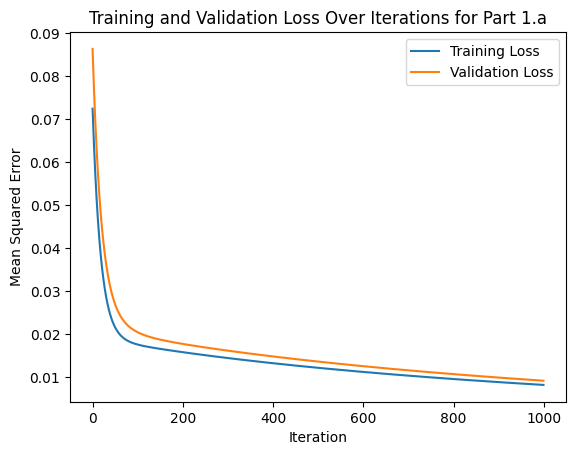


 The final value for train_loss for the linear model is 0.008253128939719467

 The final value for val_loss for the linear model is 0.009229713273980795


In [1928]:
# Gradient descent for part 1.a
train_losses, val_losses,theta_a = gradient_descent(vars_a_train, vars_a_val, train_price, val_price, alpha, theta_a, iterations)

# Linear model for part 1.a
print('\n The final theta values are:')
print(theta_a,'\n')

# 4. Plot the training and validation loss after each iteration for part 1.a
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Part 1.a")
plt.show()
print('\n The final value for train_loss for the linear model is', train_losses[-1])
print('\n The final value for val_loss for the linear model is', val_losses[-1])


 The final theta values are: 1.b) using 11 inputs: 

[0.051588839945889926 0.3097807702156289 0.029256922566162247
 0.034804411953751474 -0.012323842510554557 0.0667592459583439
 0.026479037413009485 -0.006363285070418491 0.0035859761316828827
 0.027737962335661774 0.08511037328339986 0.034878631843447506] 



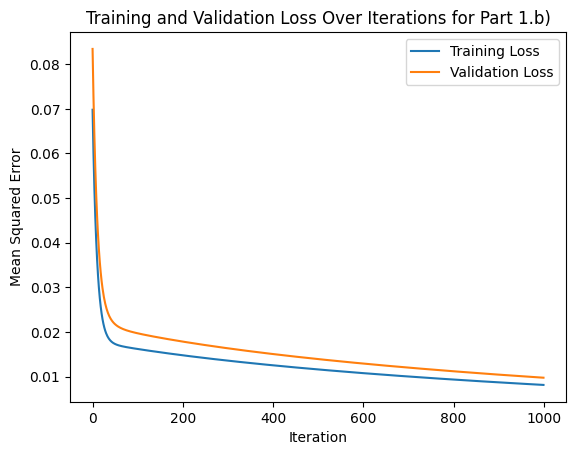


 The final value for train_loss for the linear model is 0.008115896966024296

 The final value for val_loss for the linear model is 0.009734375812250512


In [1929]:
# Gradient descent for part 1.b
train_losses, val_losses, theta_b = gradient_descent(vars_b_train, vars_b_val, train_price, val_price, alpha, theta_b, iterations)

# Linear model for part 1.b
print('\n The final theta values are: 1.b) using 11 inputs: \n')
print(theta_b,'\n')

# 4. Plot the training and validation loss after each iteration for part 1.b
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Part 1.b)")
plt.show()

print('\n The final value for train_loss for the linear model is', train_losses[-1])
print('\n The final value for val_loss for the linear model is', val_losses[-1])

In [1930]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_norm = MinMaxScaler()
scaler_stand = StandardScaler()

# Apply MinMax scaler to the training set columns
train_norm_a = train
train_norm_a[vars_a] = scaler_norm.fit_transform(train_norm_a[vars_a])
print('Training set with only 5 inputs being normalized: \n')
train_norm_a.head()

Training set with only 5 inputs being normalized: 



,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,furnished
41,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,furnished
91,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,furnished
118,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,furnished
472,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,semi-furnished


In [1931]:
# Apply MinMax scaler to the val set columns

val_norm_a = val
val_norm_a[vars_a] = scaler_norm.fit_transform(val_norm_a[vars_a])
print('Test set with only 5 inputs being normalized: \n')
val_norm_a.head()

Test set with only 5 inputs being normalized: 



,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,0.088172,0.333333,0.0,0.333333,1,0,0,0,0,0.000000,1,semi-furnished
54,0.311828,0.333333,0.5,0.333333,1,1,0,0,1,0.333333,0,semi-furnished
171,0.617849,0.333333,0.0,0.000000,1,0,0,0,0,0.333333,1,semi-furnished
244,0.263082,0.333333,0.0,0.333333,1,1,1,0,0,0.000000,1,semi-furnished
268,0.236559,0.666667,0.0,0.333333,1,0,0,0,1,0.000000,0,semi-furnished


In [1932]:
#2a
vars_2a_train_norm = np.c_[np.ones((train_len, 1)), train_norm_a[vars_a]]
vars_2a_val_norm = np.c_[np.ones((val_len, 1)), val_norm_a[vars_a]]
print('Normalized, stacked training set for part 2.a): \n\n', vars_2a_train_norm[:5])
print('\nNormalized, stacked test set for part 2.a): \n\n', vars_2a_val_norm[:5])

Normalized, stacked training set for part 2.a): 

 [[1.         0.4326093  0.4        0.         0.         0.33333333]
 [1.         0.31495405 0.4        0.33333333 1.         0.        ]
 [1.         0.34210526 0.2        0.         0.         0.66666667]
 [1.         0.31913116 0.4        0.         0.         0.        ]
 [1.         0.12489557 0.6        0.         0.33333333 1.        ]]

Normalized, stacked test set for part 2.a): 

 [[1.         0.08817204 0.33333333 0.         0.33333333 0.        ]
 [1.         0.31182796 0.33333333 0.5        0.33333333 0.33333333]
 [1.         0.61784946 0.33333333 0.         0.         0.33333333]
 [1.         0.26308244 0.33333333 0.         0.33333333 0.        ]
 [1.         0.23655914 0.66666667 0.         0.33333333 0.        ]]


In [1933]:
# Setting Variables
theta_2a = np.zeros(6)
iterations_2a = 1000
alpha_2a = 0.01



 The final theta values for the linear model of part 2.a) using 5 normalized inputs: 

[0.10558736868841728 0.34820860437023937 0.04118162859266431
 0.03958739753925949 0.006265720606656103 0.10374249733315888] 



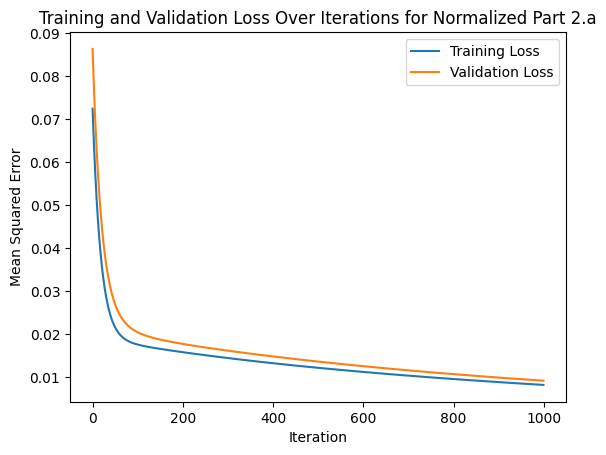


 The final value for train_loss for the linear model is 0.008253128939719464

 The final value for val_loss for the linear model is 0.009229713273980792


In [1934]:
# Doing the gradient descent for normalized inputs
train_losses, val_losses,theta_2a = gradient_descent(vars_2a_train_norm, vars_2a_val_norm, train_price, val_price, alpha_2a, theta_2a, iterations_2a)

# Linear model for part 2.a
print('\n The final theta values for the linear model of part 2.a) using 5 normalized inputs: \n')
print(theta_2a,'\n')

# 4. Plot the training and validation loss after each iteration for normalized part 1.a
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Normalized Part 2.a")
plt.show()
print('\n The final value for train_loss for the linear model is', train_losses[-1])
print('\n The final value for val_loss for the linear model is', val_losses[-1])

In [1935]:
# Problem 2.a) - Standardized Inputs for train
train_stand_a = train
train_stand_a[vars_a] = scaler_stand.fit_transform(train_stand_a[vars_a])
print('Training set with only 5 inputs being standardized: \n')
train_stand_a.head()

Training set with only 5 inputs being standardized: 



,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,1.351873,0.078679,-0.579897,-0.929023,1,1,1,0,1,0.311484,0,furnished
41,0.565326,0.078679,1.410929,2.474792,1,0,0,0,1,-0.849261,1,furnished
91,0.746837,-1.293483,-0.579897,-0.929023,1,1,1,0,0,1.472229,1,furnished
118,0.593251,0.078679,-0.579897,-0.929023,1,0,1,0,1,-0.849261,1,furnished
472,-0.705249,1.450841,-0.579897,0.205582,1,0,0,0,0,2.632974,0,semi-furnished


In [1936]:
# Problem 2.a) - Standardized Inputs for val
val_stand_a = val
val_stand_a[vars_a] = scaler_stand.fit_transform(val_stand_a[vars_a])
print('Test set with only 5 inputs being standardized: \n')
val_stand_a.head()

Test set with only 5 inputs being standardized: 



,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,-1.020953,-0.072023,-0.531775,0.308415,1,0,0,0,0,-0.643743,1,semi-furnished
54,0.369177,-0.072023,1.466964,0.308415,1,1,0,0,1,0.545545,0,semi-furnished
171,2.271249,-0.072023,-0.531775,-0.936669,1,0,0,0,0,0.545545,1,semi-furnished
244,0.066200,-0.072023,-0.531775,0.308415,1,1,1,0,0,-0.643743,1,semi-furnished
268,-0.098656,1.236396,-0.531775,0.308415,1,0,0,0,1,-0.643743,0,semi-furnished


In [1937]:
#2.a Standardized
vars_2a_train_stand = np.c_[np.ones((train_len, 1)), train_stand_a[vars_a]]
vars_2a_val_stand = np.c_[np.ones((val_len, 1)), val_stand_a[vars_a]]
print('Standardized, straining set for part 2.a): \n\n', vars_2a_train_stand[:5])
print('\nStandardized, val set for part 2.a): \n\n', vars_2a_val_stand[:5])

Standardized, straining set for part 2.a): 

 [[ 1.          1.35187274  0.07867901 -0.57989658 -0.92902305  0.31148433]
 [ 1.          0.56532627  0.07867901  1.41092949  2.4747925  -0.8492607 ]
 [ 1.          0.746837   -1.29348292 -0.57989658 -0.92902305  1.47222936]
 [ 1.          0.593251    0.07867901 -0.57989658 -0.92902305 -0.8492607 ]
 [ 1.         -0.7052488   1.45084094 -0.57989658  0.20558213  2.6329744 ]]

Standardized, val set for part 2.a): 

 [[ 1.         -1.02095327 -0.07202305 -0.53177451  0.30841537 -0.64374278]
 [ 1.          0.3691766  -0.07202305  1.46696416  0.30841537  0.54554473]
 [ 1.          2.27124853 -0.07202305 -0.53177451 -0.93666891  0.54554473]
 [ 1.          0.06619958 -0.07202305 -0.53177451  0.30841537 -0.64374278]
 [ 1.         -0.09865556  1.23639571 -0.53177451  0.30841537 -0.64374278]]


In [1938]:
# Setting Variables
theta_2a_stand = np.zeros(6)
iterations_2a_stand = 1000
alpha_2a_stand = 0.01


 The final theta values for the linear model of part 2.a) using 5 standardized inputs: 

[0.23038993980422948 0.14958445294692746 -1.6025665631958913e-07
 1.124803783821693e-07 7.126099555727306e-08 1.5482888666073853e-07] 



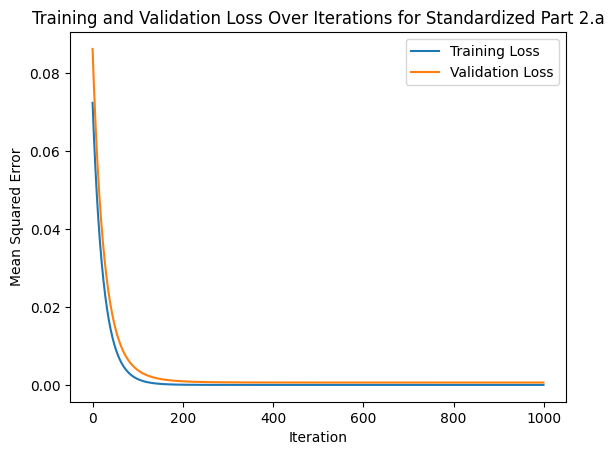


 The final value for train_loss for the linear model is 5.542253352423638e-14

 The final value for val_loss for the linear model is 0.0006136186930251041


In [1939]:
# Doing the gradient descent for standardized inputs
train_losses, val_losses, theta_2a_stand = gradient_descent(vars_2a_train_stand, vars_2a_val_stand, train_price, val_price, alpha_2a_stand, theta_2a_stand, iterations_2a_stand)

# Linear model
print('\n The final theta values for the linear model of part 2.a) using 5 standardized inputs: \n')
print(theta_2a_stand,'\n')

# 4. Plot the training and validation loss after each iteration for standardized part 1.a
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Standardized Part 2.a")
plt.show()
print('\n The final value for train_loss for the linear model is', train_losses[-1])
print('\n The final value for val_loss for the linear model is', val_losses[-1])

In [1940]:
# Problem 2.b) - Normalized Inputs for train
train_norm_b = train
train_norm_b[vars_b] = scaler_norm.fit_transform(train_norm_b[vars_b])
print('Training set with only 5 inputs being normalized: \n')
train_norm_a.head()

Training set with only 5 inputs being normalized: 



,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0,furnished
41,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,furnished
91,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0,furnished
118,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,furnished
472,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,semi-furnished


In [1941]:
# Problem 2.b) - Normalized Inputs for val
val_norm_b = val
val_norm_b[vars_b] = scaler_norm.fit_transform(val_norm_b[vars_b])
print('\n Normalized test set for 2.b): \n')
val_norm_b.head()


 Normalized test set for 2.b): 



,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,semi-furnished
54,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0,semi-furnished
171,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0,semi-furnished
244,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0,semi-furnished
268,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,semi-furnished


In [1942]:
#2b normalized
vars_2b_train_norm = np.c_[np.ones((train_len, 1)), train_norm_b[vars_b]]
vars_2b_val_norm = np.c_[np.ones((val_len, 1)), val_norm_b[vars_b]]
print('\nNormalized, stacked training inputs for 2.b): \n\n', vars_2b_train_norm[:5])
print('\nNormalized, stacked test inputs for 2.b): \n\n', vars_2b_val_norm[:5])


Normalized, stacked training inputs for 2.b): 

 [[1.         0.4326093  0.4        0.         0.         1.
  1.         1.         0.         1.         0.33333333 0.        ]
 [1.         0.31495405 0.4        0.33333333 1.         1.
  0.         0.         0.         1.         0.         1.        ]
 [1.         0.34210526 0.2        0.         0.         1.
  1.         1.         0.         0.         0.66666667 1.        ]
 [1.         0.31913116 0.4        0.         0.         1.
  0.         1.         0.         1.         0.         1.        ]
 [1.         0.12489557 0.6        0.         0.33333333 1.
  0.         0.         0.         0.         1.         0.        ]]

Normalized, stacked test inputs for 2.b): 

 [[1.         0.08817204 0.33333333 0.         0.33333333 1.
  0.         0.         0.         0.         0.         1.        ]
 [1.         0.31182796 0.33333333 0.5        0.33333333 1.
  1.         0.         0.         1.         0.33333333 0.        ]


In [1943]:
# Setting vairables
theta_2b_n = np.zeros(12)
iterations_2b_n = 1000
alpha_2b_n = 0.01


 The final theta values for the linear model of part 2.b) using 11 normalized inputs: 

[0.05158883994588992 0.30978077021562894 0.029256922566162254
 0.03480441195375147 -0.012323842510554555 0.06675924595834389
 0.026479037413009485 -0.006363285070418489 0.0035859761316828845
 0.027737962335661764 0.08511037328339986 0.034878631843447506] 



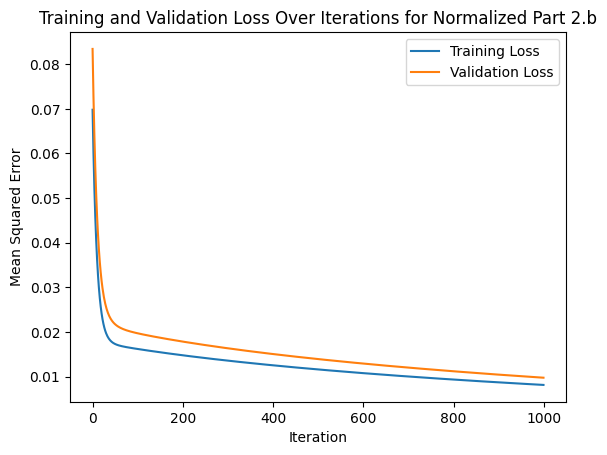


 The final value for train_loss for the linear model is 0.008115896966024293

 The final value for val_loss for the linear model is 0.009734375812250508


In [1944]:
# Doing the gradient descent for normalized inputs
train_losses, val_losses,theta_2b_n = gradient_descent(vars_2b_train_norm, vars_2b_val_norm, train_price, val_price, alpha_2b_n, theta_2b_n, iterations_2b_n)

# Linear model
print('\n The final theta values for the linear model of part 2.b) using 11 normalized inputs: \n')
print( theta_2b_n,'\n')

# 4. Plot the training and validation loss after each iteration for normalized part 1.b
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Normalized Part 2.b")
plt.show()
print('\n The final value for train_loss for the linear model is', train_losses[-1])
print('\n The final value for val_loss for the linear model is', val_losses[-1])

In [1945]:
# Problem 2.b) - Standardized Inputs for train
train_stand_b = train
train_stand_b[vars_b] = scaler_stand.fit_transform(train_stand_b[vars_b])
print('Standardized training set for 2.b): \n')
train_stand_b.head()

Standardized training set for 2.b): 



,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,1.351873,0.078679,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,1.525859,0.311484,-0.549083,furnished
41,0.565326,0.078679,1.410929,2.474792,0.399468,-0.455803,-0.738985,-0.241355,1.525859,-0.849261,1.821217,furnished
91,0.746837,-1.293483,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,-0.655369,1.472229,1.821217,furnished
118,0.593251,0.078679,-0.579897,-0.929023,0.399468,-0.455803,1.353207,-0.241355,1.525859,-0.849261,1.821217,furnished
472,-0.705249,1.450841,-0.579897,0.205582,0.399468,-0.455803,-0.738985,-0.241355,-0.655369,2.632974,-0.549083,semi-furnished


In [1946]:
# Problem 2.b) - Standardized Inputs for val
val_stand_b = val
val_stand_b[vars_b] = scaler_stand.fit_transform(val_stand_b[vars_b])
print('Standardized test set for 2.b): \n')
val_stand_b.head()

Standardized test set for 2.b): 



,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,-1.020953,-0.072023,-0.531775,0.308415,0.429863,-0.502865,-0.716860,-0.096225,-0.776493,-0.643743,1.742710,semi-furnished
54,0.369177,-0.072023,1.466964,0.308415,0.429863,1.988604,-0.716860,-0.096225,1.287842,0.545545,-0.573819,semi-furnished
171,2.271249,-0.072023,-0.531775,-0.936669,0.429863,-0.502865,-0.716860,-0.096225,-0.776493,0.545545,1.742710,semi-furnished
244,0.066200,-0.072023,-0.531775,0.308415,0.429863,1.988604,1.394972,-0.096225,-0.776493,-0.643743,1.742710,semi-furnished
268,-0.098656,1.236396,-0.531775,0.308415,0.429863,-0.502865,-0.716860,-0.096225,1.287842,-0.643743,-0.573819,semi-furnished


In [1947]:
#2b Standardized
vars_2b_train_stand = np.c_[np.ones((train_len, 1)), train_stand_b[vars_b]]
vars_2b_val_stand = np.c_[np.ones((val_len, 1)), val_stand_b[vars_b]]
print('\nStandardized, stacked training inputs for 2.b): \n\n', vars_2b_train_norm[:5])
print('\nStandardized, stacked test inputs for 2.b): \n\n', vars_2b_val_norm[:5])



Standardized, stacked training inputs for 2.b): 

 [[1.         0.4326093  0.4        0.         0.         1.
  1.         1.         0.         1.         0.33333333 0.        ]
 [1.         0.31495405 0.4        0.33333333 1.         1.
  0.         0.         0.         1.         0.         1.        ]
 [1.         0.34210526 0.2        0.         0.         1.
  1.         1.         0.         0.         0.66666667 1.        ]
 [1.         0.31913116 0.4        0.         0.         1.
  0.         1.         0.         1.         0.         1.        ]
 [1.         0.12489557 0.6        0.         0.33333333 1.
  0.         0.         0.         0.         1.         0.        ]]

Standardized, stacked test inputs for 2.b): 

 [[1.         0.08817204 0.33333333 0.         0.33333333 1.
  0.         0.         0.         0.         0.         1.        ]
 [1.         0.31182796 0.33333333 0.5        0.33333333 1.
  1.         0.         0.         1.         0.33333333 0.      

In [1948]:
# Setting vairables
theta_2b_stand = np.zeros(12)
iterations_2b_stand= 1000
alpha_2b_stand = 0.01


 The final theta values for the linear model of part 2.b) using 11 standardized inputs: 

[0.23038993980422948 0.14958187031127473 3.987752530801657e-06
 1.0327010658797234e-06 -6.1609416219101605e-06 2.219827814576102e-06
 2.244061897721103e-06 -4.591302424280667e-06 5.492574082045511e-07
 2.2750144714051586e-06 -6.908467813256345e-07 1.463586734442287e-06] 



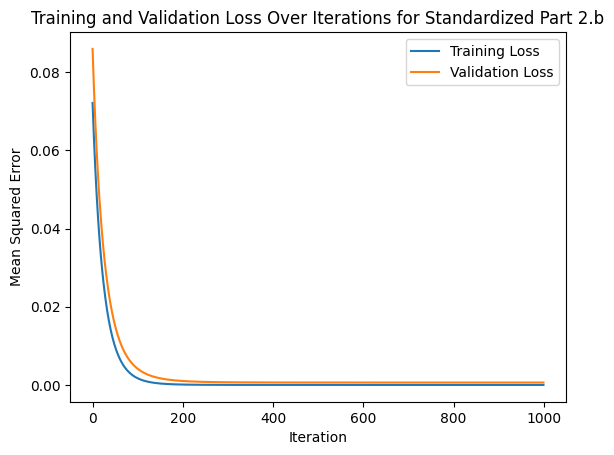


 The final value for train_loss for the linear model is 4.1046816219814556e-11

 The final value for val_loss for the linear model is 0.0006136365557621547


In [1949]:
# Doing the gradient descent for standardized inputs
train_losses, val_losses, theta_2b_stand  = gradient_descent(vars_2b_train_stand, vars_2b_val_stand, train_price, val_price, alpha_2b_stand, theta_2b_stand, iterations_2b_stand)

# Linear model
print('\n The final theta values for the linear model of part 2.b) using 11 standardized inputs: \n')
print(theta_2b_stand, '\n')

# 4. Plot the training and validation loss after each iteration for standardized part 1.b
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Standardized Part 2.b")
plt.show()
print('\n The final value for train_loss for the linear model is', train_losses[-1])
print('\n The final value for val_loss for the linear model is', val_losses[-1])

In [1950]:
# Problem 3
#Gradient descent function

def gradient_descent_penalty(train, val, train_price, val_price, alpha, theta, iterations, pen_par, inputs):
    train_losses = []
    val_losses = []

    for iteration in range(iterations):
        gradients = 2/(len(train)) * train.T.dot(train.dot(theta) - train_price)
        theta = theta - alpha * gradients

        train_loss = (1/len(train)) * (np.sum(np.square(train.dot(theta) - train_price)) + pen_par * np.square(np.sum(theta)))
        val_loss = (1/len(val)) * np.sum(np.square(val.dot(theta) - val_price))

        train_losses.append(train_loss)
        val_losses.append(val_loss)


    return train_losses, val_losses, theta



In [1951]:
# Problem 3.a) - Normalized Inputs

vars_3a_train_norm = vars_2a_train_norm
vars_3a_val_norm = vars_2a_val_norm
print('\nNormalized, stacked training inputs for 3.a): \n\n', vars_3a_train_norm[:5])
print('\nNormalized, stacked test inputs for 3.a): \n\n', vars_3a_val_norm[:5])


Normalized, stacked training inputs for 3.a): 

 [[1.         0.4326093  0.4        0.         0.         0.33333333]
 [1.         0.31495405 0.4        0.33333333 1.         0.        ]
 [1.         0.34210526 0.2        0.         0.         0.66666667]
 [1.         0.31913116 0.4        0.         0.         0.        ]
 [1.         0.12489557 0.6        0.         0.33333333 1.        ]]

Normalized, stacked test inputs for 3.a): 

 [[1.         0.08817204 0.33333333 0.         0.33333333 0.        ]
 [1.         0.31182796 0.33333333 0.5        0.33333333 0.33333333]
 [1.         0.61784946 0.33333333 0.         0.         0.33333333]
 [1.         0.26308244 0.33333333 0.         0.33333333 0.        ]
 [1.         0.23655914 0.66666667 0.         0.33333333 0.        ]]


In [1952]:
# Setting vairables
theta_3a = np.zeros(6)
iterations_3a = 1500
alpha_3a = 0.01
inputs_a = 5
pen_par = 0.000000001


 The final theta values for the linear model of part 3.a) using 5 normalized inputs and parameter penalties: 

[0.08588468504373042 0.45895885284383775 0.03240743614563863
 0.04307175858069527 8.299980413451082e-05 0.09707626883712636] 



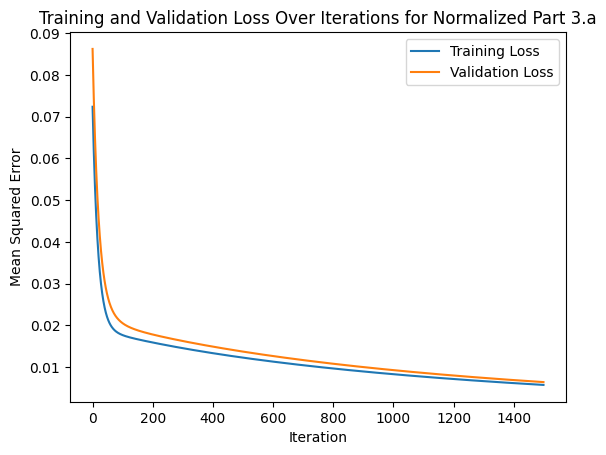


 The final value for train_loss for the linear model is 0.005677814778723215

 The final value for val_loss for the linear model is 0.006355843562541624


In [1953]:
# Doing the gradient descent for normalized inputs
train_losses_3, val_losses_3, theta_3a = gradient_descent_penalty(vars_3a_train_norm, vars_3a_val_norm, train_price, val_price, alpha_3a_n, theta_3a, iterations_3a, pen_par, inputs_a)

# Linear model
print('\n The final theta values for the linear model of part 3.a) using 5 normalized inputs and parameter penalties: \n')
print(theta_3a,'\n')

# 4. Plot the training and validation loss after each iteration for normalized part 1.a
plt.plot(train_losses_3, label="Training Loss")
plt.plot(val_losses_3, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Normalized Part 3.a")
plt.show()
print('\n The final value for train_loss for the linear model is', train_losses_3[-1])
print('\n The final value for val_loss for the linear model is', val_losses_3[-1])

In [1954]:
# Problem 3.a) - Standardized Inputs

vars_3a_train_stand = vars_2a_train_stand
vars_3a_val_stand = vars_2a_val_stand
print('\nStandardized, stacked training inputs for 3.a): \n\n', vars_3a_train_stand[:5])
print('\nStandardized, stacked test inputs for 3.a): \n\n', vars_3a_val_stand[:5])


Standardized, stacked training inputs for 3.a): 

 [[ 1.          1.35187274  0.07867901 -0.57989658 -0.92902305  0.31148433]
 [ 1.          0.56532627  0.07867901  1.41092949  2.4747925  -0.8492607 ]
 [ 1.          0.746837   -1.29348292 -0.57989658 -0.92902305  1.47222936]
 [ 1.          0.593251    0.07867901 -0.57989658 -0.92902305 -0.8492607 ]
 [ 1.         -0.7052488   1.45084094 -0.57989658  0.20558213  2.6329744 ]]

Standardized, stacked test inputs for 3.a): 

 [[ 1.         -1.02095327 -0.07202305 -0.53177451  0.30841537 -0.64374278]
 [ 1.          0.3691766  -0.07202305  1.46696416  0.30841537  0.54554473]
 [ 1.          2.27124853 -0.07202305 -0.53177451 -0.93666891  0.54554473]
 [ 1.          0.06619958 -0.07202305 -0.53177451  0.30841537 -0.64374278]
 [ 1.         -0.09865556  1.23639571 -0.53177451  0.30841537 -0.64374278]]


In [1955]:
# Setting vairables
theta_3a_stand = np.zeros(6)
iterations_3a_stand = 1500
alpha_3a_stand = 0.01
inputs_a = 5
pen_par = 0.00000001


 The final theta values for the linear model of part 3.a) using 5 standardized inputs and parameter penalties: 

[0.23038994019195225 0.14958461233977535 -6.155341575527225e-10
 2.9377186019221064e-10 3.690451083600429e-10 3.1675914527860127e-10] 



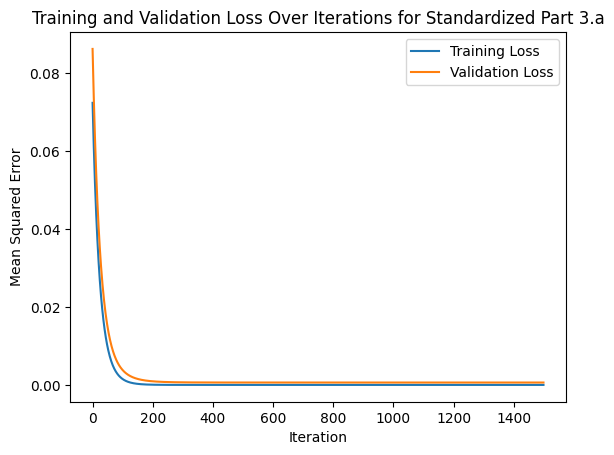


 The final value for train_loss for the linear model is 3.3114834922326225e-12

 The final value for val_loss for the linear model is 0.0006136165028186106


In [1956]:
# Doing the gradient descent for standardized inputs
train_losses_3_stand, val_losses_3_stand, theta_3a_stand = gradient_descent_penalty(vars_3a_train_stand, vars_3a_val_stand, train_price, val_price, alpha_3a_stand, theta_3a_stand, iterations_3a_stand, pen_par, inputs_a)

# Linear model
print('\n The final theta values for the linear model of part 3.a) using 5 standardized inputs and parameter penalties: \n')
print(theta_3a_stand,'\n')

# 4. Plot the training and validation loss after each iteration for standardized part 1.a
plt.plot(train_losses_3_stand, label="Training Loss")
plt.plot(val_losses_3_stand, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Standardized Part 3.a")
plt.show()
print('\n The final value for train_loss for the linear model is', train_losses_3_stand[-1])
print('\n The final value for val_loss for the linear model is', val_losses_3_stand[-1])

In [1957]:
# Problem 3.b) Normalized Inputs

vars_3b_train_norm = vars_2b_train_norm
vars_3b_val_norm = vars_2b_val_norm
print('\nNormalized, stacked training inputs for 3.b): \n\n', vars_3b_train_norm[:5])
print('\nNormalized, stacked test inputs for 3.b): \n\n', vars_3b_val_norm[:5])



Normalized, stacked training inputs for 3.b): 

 [[1.         0.4326093  0.4        0.         0.         1.
  1.         1.         0.         1.         0.33333333 0.        ]
 [1.         0.31495405 0.4        0.33333333 1.         1.
  0.         0.         0.         1.         0.         1.        ]
 [1.         0.34210526 0.2        0.         0.         1.
  1.         1.         0.         0.         0.66666667 1.        ]
 [1.         0.31913116 0.4        0.         0.         1.
  0.         1.         0.         1.         0.         1.        ]
 [1.         0.12489557 0.6        0.         0.33333333 1.
  0.         0.         0.         0.         1.         0.        ]]

Normalized, stacked test inputs for 3.b): 

 [[1.         0.08817204 0.33333333 0.         0.33333333 1.
  0.         0.         0.         0.         0.         1.        ]
 [1.         0.31182796 0.33333333 0.5        0.33333333 1.
  1.         0.         0.         1.         0.33333333 0.        ]


In [1958]:
# Setting vairables
theta_3b = np.zeros(12)
iterations_3b = 2000
alpha_3b = 0.001
inputs_a = 11
pen_par = 0.00000001


 The final theta values for the linear model of part 3.b) using 11 normalized inputs and parameter penalties: 

[0.08068257003178037 0.09099358650254531 0.03427303749249535
 0.017064811723325118 0.015739878815659865 0.08341114439489486
 0.021011085112381953 0.015759260658986897 0.00497921462148999
 0.03529222357461824 0.05153424872650911 0.033112352873946226] 



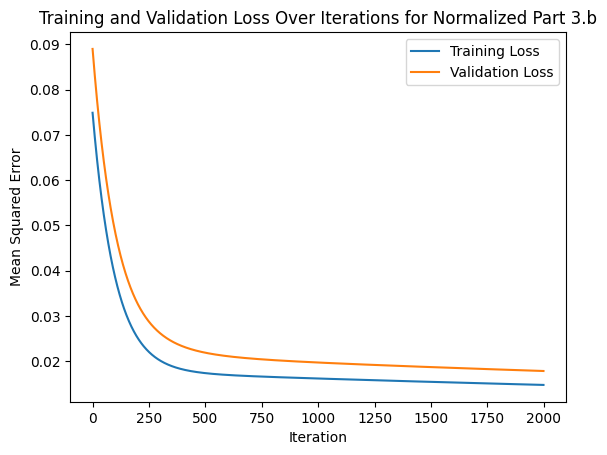


 The final value for train_loss for the linear model is 0.014767952221165396

 The final value for val_loss for the linear model is 0.017843136633476715


In [1959]:
# Doing the gradient descent for normalized inputs
train_losses_3b, val_losses_3b, theta_3b = gradient_descent_penalty(vars_3b_train_norm, vars_3b_val_norm, train_price, val_price, alpha_3b, theta_3b, iterations_3b, pen_par, inputs_a)

# Linear model
print('\n The final theta values for the linear model of part 3.b) using 11 normalized inputs and parameter penalties: \n')
print(theta_3b,'\n')

# 4. Plot the training and validation loss after each iteration for normalized part 1.b
plt.plot(train_losses_3b, label="Training Loss")
plt.plot(val_losses_3b, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Normalized Part 3.b")
plt.show()
print('\n The final value for train_loss for the linear model is', train_losses_3b[-1])
print('\n The final value for val_loss for the linear model is', val_losses_3b[-1])

In [1960]:
# Problem 3.b) Standardized Inputs

vars_3b_train_stand = vars_2b_train_stand
vars_3b_val_stand = vars_2b_val_stand
print('\n Standardized, stacked training inputs for 3.b): \n\n', vars_3b_train_stand[:5])
print('\n Standardized, stacked test inputs for 3.b): \n\n', vars_3b_val_stand[:5])



 Standardized, stacked training inputs for 3.b): 

 [[ 1.          1.35187274  0.07867901 -0.57989658 -0.92902305  0.39946773
   2.19393102  1.35320687 -0.2413554   1.52585854  0.31148433 -0.54908336]
 [ 1.          0.56532627  0.07867901  1.41092949  2.4747925   0.39946773
  -0.45580284 -0.73898531 -0.2413554   1.52585854 -0.8492607   1.82121709]
 [ 1.          0.746837   -1.29348292 -0.57989658 -0.92902305  0.39946773
   2.19393102  1.35320687 -0.2413554  -0.65536875  1.47222936  1.82121709]
 [ 1.          0.593251    0.07867901 -0.57989658 -0.92902305  0.39946773
  -0.45580284  1.35320687 -0.2413554   1.52585854 -0.8492607   1.82121709]
 [ 1.         -0.7052488   1.45084094 -0.57989658  0.20558213  0.39946773
  -0.45580284 -0.73898531 -0.2413554  -0.65536875  2.6329744  -0.54908336]]

 Standardized, stacked test inputs for 3.b): 

 [[ 1.         -1.02095327 -0.07202305 -0.53177451  0.30841537  0.42986348
  -0.50286535 -0.71686044 -0.09622504 -0.77649287 -0.64374278  1.74270968]
 [ 

In [1961]:
# Setting vairables
theta_3b_stand = np.zeros(12)
iterations_3b_stand = 1500
alpha_3b_stand = 0.01
inputs_a = 11
pen_par = 0.00000001


 The final theta values for the linear model of part 3.b) using 11 standardized inputs and paramter penalties: 

[0.23038994019195222 0.14958457253443397 7.393974105742309e-08
 1.34840582508047e-08 -1.0893000773158447e-07 3.692910118612188e-08
 3.757846869749163e-08 -7.970722350859049e-08 1.1057277605613486e-08
 4.1348207146377534e-08 -1.783773916872843e-08 2.3542659257462134e-08] 



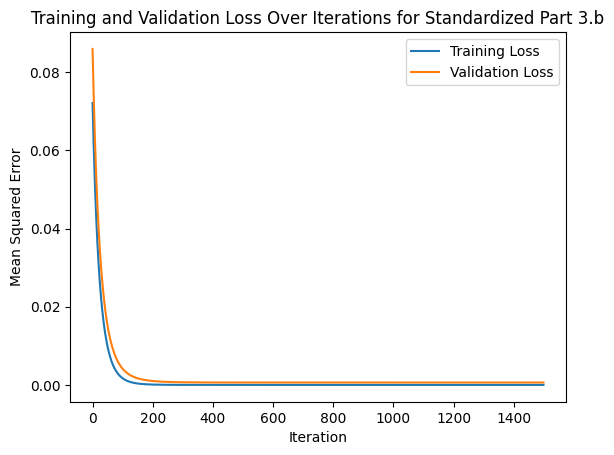


 The final value for train_loss for the linear model is 3.3239536640464165e-12

 The final value for val_loss for the linear model is 0.0006136167517353186


In [1962]:
# Doing the gradient descent for normalized inputs
train_losses_3b_stand, val_losses_3b_stand,theta_3b_stand = gradient_descent_penalty(vars_3b_train_stand, vars_3b_val_stand, train_price, val_price, alpha_3b_stand, theta_3b_stand, iterations_3b_stand, pen_par, inputs_a)

# Linear model
print('\n The final theta values for the linear model of part 3.b) using 11 standardized inputs and paramter penalties: \n')
print(theta_3b_stand,'\n')

# 4. Plot the training and validation loss after each iteration for normalized part 1.b
plt.plot(train_losses_3b_stand, label="Training Loss")
plt.plot(val_losses_3b_stand, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Standardized Part 3.b")
plt.show()
print('\n The final value for train_loss for the linear model is', train_losses_3b_stand[-1])
print('\n The final value for val_loss for the linear model is', val_losses_3b_stand[-1])